<a href="https://colab.research.google.com/github/Abinaya-J/Udacity_Intro_to_Data_Analysis/blob/master/Project_1_Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
The following project would be a summary of findings through an insight into data regarding the passengers onboard during the sinking of the Titanic.It would mainly focus on survival rates of passengers depending on their sex, age ,socio-economic status and various other factors that contributed to it. 


In [1]:
import csv
titanic_data=[]
with open('titanic_data.csv', 'rt') as f:
  reader = csv.DictReader(f)
  titanic_data = list(reader)

print(titanic_data[0])

OrderedDict([('PassengerId', '1'), ('Survived', '0'), ('Pclass', '3'), ('Name', 'Braund, Mr. Owen Harris'), ('Sex', 'male'), ('Age', '22'), ('SibSp', '1'), ('Parch', '0'), ('Ticket', 'A/5 21171'), ('Fare', '7.25'), ('Cabin', ''), ('Embarked', 'S')])


 # **Data Wrangling**
According to one row of the data obtained above, the data provided in each column can be described as follows:


*   PassengerId = the unique number that identifies each passenger
*   Survived = Value of "1" indicates the passenger survived and "0" indicates otherwise
*   Pclass = Passenger class (1 = 1st class, 2 = 2nd, 3 = 3rd)
*   Name = Name of passenger
*   Sex = Sex of Passenger
*   Age = Age of Passenger
*   SibSp = Number of Siblings/Spouses of the passenger aboard
*   Parch = Number of Parents/Children of the passenger aboard
*   Ticket = Ticket number of Passenger
*   Fare = Passenger ticket fare
*   Cabin = Cabin passenger travelled in
*   Embarked = Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

*Special Notes*
1.   Pclass: proxy for the passenger's socio-economic status (1 = Upper, 2 = Middle ,3 = Lower) 
2.   Sibling: brother, sister, stepbrother, or stepsister of passenger aboard
3.   Spouse: husband or wife of passenger aboard(mistresses and fiancees ignored)
4.   Parent: mother or father of passenger aboard
5.   Child: son, daughter, stepson, or stepdaughter of passenger aboard

*Additional Potential Questions*
1. Did having relatives aboard increase chance of survival?
2. Was there any correlation between survival and the port of embarkation??
3. Did the same sex always get higher preference despite the socio-economic class they belonged to?













 # **Data Cleaning**

Firsly for duplicate entries to be removed I created a set contaning all unique PassengerId values which shows there aren't any since it has the same number of entries as in the original set of data.
Also removing unnecessary columns helps data exploration so I thought the columns: Cabin,Name and Ticket weren't contributing much for the analysis and so deleted them.


In [2]:
#Checking for duplicate entries

print(len(titanic_data))

unique_passenger_records= set()
for passenger_record in titanic_data:
  unique_passenger_records.add(passenger_record['PassengerId'])
print(len(unique_passenger_records))


891
891


In [3]:
#Removing unnecessary columns

for passenger_record in titanic_data:
  passenger_record.pop('Cabin',None)
  passenger_record.pop('Ticket',None)
  passenger_record.pop('Fare',None)

print(titanic_data[1])

OrderedDict([('PassengerId', '2'), ('Survived', '1'), ('Pclass', '1'), ('Name', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'), ('Sex', 'female'), ('Age', '38'), ('SibSp', '1'), ('Parch', '0'), ('Embarked', 'C')])


 # **Data Exploration**
 This phase of the project would look into code used to identify factors that contributed to higher survival rates as mentioned in the introduction.It would also identify some interesting statistical facts from the data, for example: Who was the youngest survivor? 
Before carrying out the analysis I decided to use the pandas library to convert the data in the csv file into a dataframe to make it more accesible and visual.Unnecessary columns are also removed.
I have also imported the matplotlib library to represent results obtained through diagrams.Using the isnull function helps us spot missing values in all the respective columns in the dataframe.




In [4]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#Representing the data in a dataframe

titanic_df = pd.read_csv('titanic_data.csv')

print(titanic_df.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [6]:
#Removing unnecessary columns

titanic_df_new = titanic_df.drop(['PassengerId','Ticket','Cabin','Fare'], axis=1)
print(titanic_df_new.head())

   Survived  Pclass  ... Parch Embarked
0         0       3  ...     0        S
1         1       1  ...     0        C
2         1       3  ...     0        S
3         1       1  ...     0        S
4         0       3  ...     0        S

[5 rows x 8 columns]


In [7]:
#Finding the number of rows with missing data in each column

titanic_df_new.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

**What percentage of the total number of passengers survived?**

In [8]:
#Finding the total number of rows which contain the value '1' in the column 'Survived' to find how many survived altogether

survived = titanic_df_new['Survived']== True
non_survived = titanic_df_new['Survived']== False

print('Number of passengers who survived: {}'.format(survived.sum()))
print('Number of passengers who did not survive: {}'.format(non_survived.sum()))

percent_survived =(survived.sum()/891) *100
print('Percentage of passengers who survived: {} %'.format(percent_survived))

Number of passengers who survived: 342
Number of passengers who did not survive: 549
Percentage of passengers who survived: 38.38383838383838 %


Text(0.5, 1.0, 'Number of survivors')

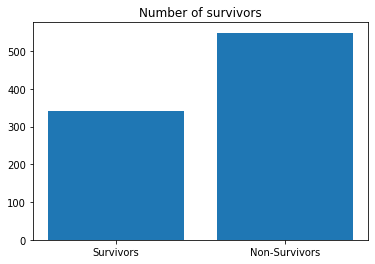

In [9]:
names=['Survivors','Non-Survivors']
values=[survived.sum(),non_survived.sum()]
plt.bar(names,values)
plt.title('Number of survivors')

**Did survival rates depend on the sex of the passenger?**



In [10]:
fs= titanic_df_new.groupby(['Survived', 'Sex']).size()
print(fs)

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64


In [11]:
#Checking the number of rows that meet two conditions:
   #contain the value '1' in the 'Survived' column
   #have either 'female' or 'male' in the 'Sex' column

female_survived = titanic_df_new[survived]['Sex']=='female'
male_survived = titanic_df_new[survived]['Sex']=='male'

print('Number of female passengers who survived: {}'.format(female_survived.sum()))
print('Number of male passengers who survived: {}'.format(male_survived.sum()))

percent_female_survived = (female_survived.sum()/survived.sum()) *100
print('{}% of the passengers who survived were female.'.format(percent_female_survived))

Number of female passengers who survived: 233
Number of male passengers who survived: 109
68.12865497076024% of the passengers who survived were female.


Text(0.5, 1.0, 'Number of female survivors')

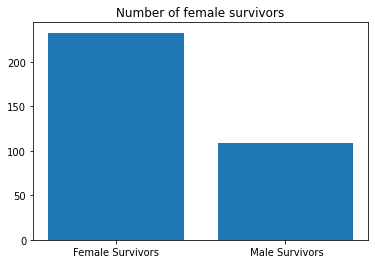

In [12]:
names=['Female Survivors',' Male Survivors']
values=[female_survived.sum(),male_survived.sum()]
plt.bar(names,values)
plt.title('Number of female survivors')

**Who were the youngest and oldest survivors and how old were they?**



In [13]:
#The 'argmin' or 'argmax' function returns the row number with the minimum/maximum age value
#The 'iloc' function then locates the row, identifies the column given and returns the entry in it along the respective row number

youngest_survivor = titanic_df_new[survived]['Age'].argmin()
youngest_survivor_name = titanic_df_new[survived].iloc[youngest_survivor]['Name']
youngest_survivor_age= titanic_df_new[survived].iloc[youngest_survivor]['Age']
print('The youngest survivor {} was {} years old.'.format(youngest_survivor_name,youngest_survivor_age))

oldest_survivor = titanic_df_new[survived]['Age'].argmax()
oldest_survivor_name = titanic_df_new[survived].iloc[oldest_survivor]['Name']
oldest_survivor_age= titanic_df_new[survived].iloc[oldest_survivor]['Age']
print('The oldest survivor {} was {} years old.'.format(oldest_survivor_name,oldest_survivor_age))

The youngest survivor Thomas, Master. Assad Alexander was 0.42 years old.
The oldest survivor Barkworth, Mr. Algernon Henry Wilson was 80.0 years old.


**Who were the youngest and oldest non-survivors and how old were they?**



In [14]:
youngest_non_survivor = titanic_df_new[non_survived]['Age'].argmin()
youngest_non_survivor_name = titanic_df_new[non_survived].iloc[youngest_non_survivor]['Name']
youngest_non_survivor_age= titanic_df_new[non_survived].iloc[youngest_non_survivor]['Age']
print('The youngest non-survivor {} was {} years old.'.format(youngest_non_survivor_name,youngest_non_survivor_age))

oldest_non_survivor = titanic_df_new[non_survived]['Age'].argmax()
oldest_non_survivor_name = titanic_df_new[non_survived].iloc[oldest_non_survivor]['Name']
oldest_non_survivor_age= titanic_df_new[non_survived].iloc[oldest_non_survivor]['Age']
print('The oldest non-survivor {} was {} years old.'.format(oldest_non_survivor_name,oldest_non_survivor_age))

The youngest non-survivor Panula, Master. Eino Viljami was 1.0 years old.
The oldest non-survivor Svensson, Mr. Johan was 74.0 years old.


**Which age group consisted of the largest number of survivors?**


In [15]:
#The sum function is used to find the total number of passengers who survived and satisfy the condition on the age value
#Then the corresponding values are subtracted to find how many fall in each interval 

below_12 = titanic_df_new[survived]['Age']<=12
below_19 = titanic_df_new[survived]['Age']<=19
below_59 = titanic_df_new[survived]['Age']<=59
below_150 = titanic_df_new[survived]['Age']<=150

children_survived = below_12.sum()
teenagers_survived = below_19.sum() - below_12.sum()
adults_survived = below_59.sum() - (below_19.sum())
elderly_survived = below_150.sum() - (below_59.sum())

print('Number of children who survived: {}'.format(children_survived))
print('Number of teenagers who survived: {}'.format(teenagers_survived))
print('Number of adults who survived: {}'.format(adults_survived))
print('Number of elderly who survived: {}'.format(elderly_survived))

Number of children who survived: 40
Number of teenagers who survived: 39
Number of adults who survived: 204
Number of elderly who survived: 7


**Which age group had the highest survival rate? Did age have any significant effect on the chance of survival?**

Text(0.5, 1.0, 'Survival rates according to age groups')

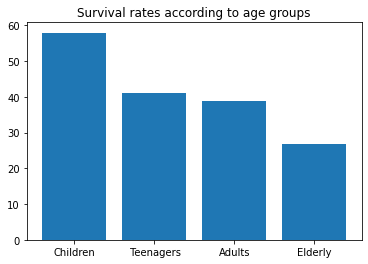

In [16]:
below_12_all = titanic_df_new['Age']<=12
below_19_all= titanic_df_new['Age']<=19
below_59_all= titanic_df_new['Age']<=59
below_150_all = titanic_df_new['Age']<=150

children_total = below_12_all.sum()
teenagers_total = below_19_all.sum() - below_12_all.sum()
adults_total = below_59_all.sum() - (below_19_all.sum())
elderly_total = below_150_all.sum() - (below_59_all.sum())

children_sr = (children_survived/children_total)*100
teenager_sr = (teenagers_survived/teenagers_total)*100
adults_sr = (adults_survived /adults_total)*100
elderly_sr = (elderly_survived/elderly_total)*100

names=['Children',' Teenagers','Adults','Elderly']
values=[children_sr,teenager_sr,adults_sr,elderly_sr]
plt.bar(names,values)
plt.title('Survival rates according to age groups')

**Which socio-economic group had the highest number of survivors?**

In [17]:
#This function groups all records by which 'Pclass' the belong to and then the 'size' argument finds the number of records it contains

def survival(Pclass):
  return titanic_df_new.groupby(['Pclass','Survived']).size()[Pclass,1].astype('float')

print('Out of all passengers who survived, {} belonged to the upper class , {} belonged to the middle class and {} belonged to the lower class.'.format(survival(1),survival(2),survival(3)))

Out of all passengers who survived, 136.0 belonged to the upper class , 87.0 belonged to the middle class and 119.0 belonged to the lower class.


Text(0.5, 1.0, 'Number of survivors in each socio-economic class')

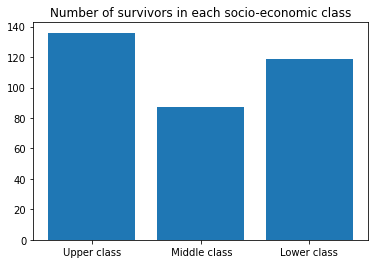

In [18]:
names=['Upper class',' Middle class','Lower class']
values=[survival(1),survival(2),survival(3)]
plt.bar(names,values)
plt.title('Number of survivors in each socio-economic class')

**Did females still have a higher survival rate among each socio-economic class?**

In [19]:
#The above function was modified to include the 'Sex' column with the condition for it to be 'female' to see how many females survived in each 'Pclass'

def survival_female(Pclass):
  return titanic_df_new.groupby(['Pclass','Survived','Sex']).size()[Pclass,1,'female'].astype('float')

print( '{} % of Upper class citizens who survived were females'.format((survival_female(1)/survival(1)) *100))

print('Similarly {} % in the Middle class and {} % in the Lower class'.format(((survival_female(2)/survival(2)) *100), ((survival_female(3)/survival(3)) *100)))

66.91176470588235 % of Upper class citizens who survived were females
Similarly 80.45977011494253 % in the Middle class and 60.50420168067227 % in the Lower class


**Which socio economic class had the highest survival rates?**

In [20]:
#The 'total' function helps find how many passengers were in each of the socio-economic classes.Both the survival and total functions were used
#to find the percentage of survivors in each Pclass

def total(Pclass):
  return titanic_df_new.groupby(['Pclass']).size()[Pclass].astype('float')

Pclass1_sr = (survival(1)/total(1))*100
Pclass2_sr = (survival(2)/total(2))*100
Pclass3_sr = (survival(3)/total(3))*100

print('{} % of upper class citizens survived'.format(Pclass1_sr))
print('{} % of middle class citizens survived'.format(Pclass2_sr))
print('{} % of lower class citizens survived'.format(Pclass3_sr))

62.96296296296296 % of upper class citizens survived
47.28260869565217 % of middle class citizens survived
24.236252545824847 % of lower class citizens survived


**Did the port of embarkation contribute to the passenger's chance of survival?**

In [21]:
#The sum function is used to find the total number of passengers who survived according to their port of embarkation 

Port_C_s= titanic_df_new[survived]['Embarked']=='C'
Port_S_s= titanic_df_new[survived]['Embarked']=='S'
Port_Q_s= titanic_df_new[survived]['Embarked']=='Q'

print('Out of all passengers who survived, {} were to be embarked at Cherbourg , {} were to be embarked at Southhampton and {} were to be embarked at Queenstown.'.format(Port_C_s.sum(),Port_S_s.sum(),Port_Q_s.sum()))

Out of all passengers who survived, 93 were to be embarked at Cherbourg , 217 were to be embarked at Southhampton and 30 were to be embarked at Queenstown.


Text(0.5, 1.0, 'Number of survivors according to their port of embarkation')

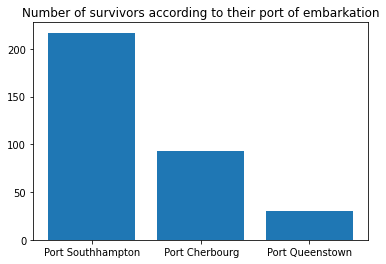

In [22]:
names=['Port Southhampton',' Port Cherbourg','Port Queenstown']
values=[Port_S_s.sum(),Port_C_s.sum(),Port_Q_s.sum()]
plt.bar(names,values)
plt.title('Number of survivors according to their port of embarkation')

**Did having relatives aboard increase chance of survival?**

In [ ]:
data= titanic_df_new.groupby(['Parch', 'SibSp']).size()
print(data)

In [32]:
#The 'count' function is used to get the sum of non-null values that satisy all conditions specified on respective columns

with_relatives=titanic_df_new[(titanic_df_new.Parch!=0)&(titanic_df_new.SibSp != 0)].count()
print(with_relatives)

with_relatives_survived =titanic_df_new[(titanic_df_new.Parch!=0) & (titanic_df_new.SibSp != 0)]['Survived'].sum()
print(with_relatives_survived)

print('{} % of passengers with relatives aboard survived'.format((with_relatives_survived/142)*100))

Survived    142
Pclass      142
Name        142
Sex         142
Age         126
SibSp       142
Parch       142
Embarked    142
dtype: int64
62
43.66197183098591 % of passengers with relatives aboard survived


In [ ]:
without_relatives=titanic_df_new[(titanic_df_new.Parch==0) & (titanic_df_new.SibSp == 0)].count()

without_relatives_survived =titanic_df_new[(titanic_df_new.Parch==0) & (titanic_df_new.SibSp == 0)]['Survived'].sum()

print('{} % of passengers without relatives aboard survived'.format((without_relatives_survived/537)*100))

30.353817504655495 % of passengers without relatives aboard survived


**Were there nannies present? Did children with nannies fare better in terms of survival?**

In [26]:
#The 'count' function is used to get the sum of non-null values that satisy all conditions specified on respective columns

children_with_nannies = titanic_df_new[(titanic_df_new.Parch==0)  & (titanic_df_new.SibSp==0) & (titanic_df_new.Age <= 18)].count()
print(children_with_nannies)

Survived    36
Pclass      36
Name        36
Sex         36
Age         36
SibSp       36
Parch       36
Embarked    36
dtype: int64


In [29]:
children_with_nannies_survived = titanic_df_new[(titanic_df_new.Parch==0)  & (titanic_df_new.SibSp==0) & (titanic_df_new.Age <= 18)]['Survived'].sum()
print(children_with_nannies_survived)

13


 # **Conclusion**

This project analyzed data regarding passengers aboard the titanic ship and their survival statistics. It being my first data analysis project, I definitely have to say it was an exciting learning experience and answered my question as to how coding makes analyzing much easier. To begin with I was confused as to where to start, but Lesson 1 of the Intro to Data Analysis course in Udacity introduced me to the different stages of data analysis which I followed too. 

Firstly, I loaded in  my data and went through each column and tried to understand information it contained. I then checked for duplicate data to get rid of. Once I knew there were no duplicates I thought of any correlation there could be within data in individual columns and listed down other potential questions that crossed my mind. To make analysis easier I removed unnecessary columns from the data. 

The same course mentioned above also gives us an insight into numpy and pandas to be used along to obtain and represent results from the data much faster which did come in very handy for me. Using a dataframe to store my data helped visualizing data and so I continued to check if there were any missing data.

Now it was time to answer my questions regarding the data. I started by seeing how many survived in total and then looking at different factors which could have affected survival rates. Results did prove more females survived overall. Looking at different age groups among passengers, we also can clearly see cildren had the highest survival rate and rates reduced as age increased.I also was curious to know who were the youngest and oldest survivors.

Taking the socio-economic class each pasenger belonged, it was evident that upper class citizens had higher survival rates and an interesting observation made was that among each socio economic class females still did have higher survival rates compared to men.The results also show more passengers to be embarked at Port Southhampton survived compared to the others.

Another factor I looked into was whether having relatives or nannied aboard increased a passenger's chance of survival and the results did show passenger's with relatives had higher survival rates.

Overall, it was amazing to code and see it in practice although I did face a few challenges myself. Sometimes multiple errors can be quite frustating but, understanding what each error meant, using peer review and going through documentation available online did guide me through. Extended hours of coding can also be tiresome but focusing on some other work meanwhile and taking sufficient breaks time to time made me more efficient.

I would finally like to mention peer review was a major part of my project, since listening to feedback with a different point of view and implementing it only makes your work better, helps you overcome your challenges and I learnt a lot more this way too.
 
 